In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [20]:
df= pd.read_csv('../csv/after_cleaning/mubawab_preprocessed.csv')
df.head()

,delegation,superficie,chambres,salle_de_bains,etat,etage,gouvernorat_ariana,gouvernorat_ben-arous,gouvernorat_la-manouba,gouvernorat_tunis,prix
0,26.0,88,2,1,9,1,0.0,0.0,0.0,1.0,340000.0
1,23.0,100,2,1,9,1,0.0,0.0,0.0,1.0,135000.0
2,36.0,152,2,1,9,1,0.0,0.0,0.0,1.0,680000.0
3,36.0,120,1,1,9,1,0.0,0.0,0.0,1.0,470000.0
4,31.0,145,3,1,11,4,0.0,0.0,0.0,1.0,260000.0


**train test split**

NOTE: Tree-based models are not affected by the scale of features because they split based on feature thresholds

In [21]:
X= df.drop(columns='prix')

y= df['prix']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

**parameters tuning**

In [22]:

# Hyperparameters to tune
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'n_estimators': [10, 50, 100, 200]
}

# Grid Search
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best CV score: 0.5932387447801133


/home/lost-elf/Apartments-Sales/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
900 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
476 fits failed with the following error:
Traceback (most recent call last):
  File "/home/lost-elf/Apartments-Sales/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lost-elf/Apartments-Sales/venv/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/lost-elf/Apartments-Sales/venv/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validat

In [30]:
model= RandomForestRegressor(**grid_search.best_params_, oob_score= True)
model.fit(X_train, y_train)

y_hat= model.predict(X_test)

In [31]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
r2 = r2_score(y_test, y_hat)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R²: {r2}")

Mean Absolute Error (MAE): 112839.91278205618
Root Mean Squared Error (RMSE): 189309.4625653418
Mean Squared Error (MSE): 35838072616.77854
R²: 0.6677755954821005


**R² is around 66% , this means that LR model explains about 66% of the variance in apartment prices.
The higher the R², the better the model’s fit to the data.**

**cross validation**

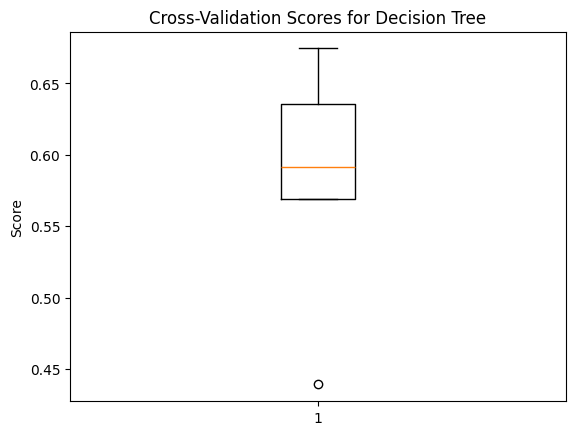

Average CV Score: 0.5818931733315962


In [32]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Plotting the cross-validation scores
plt.boxplot(cv_scores)
plt.title('Cross-Validation Scores for Decision Tree')
plt.ylabel('Score')
plt.show()

print(f'Average CV Score: {cv_scores.mean()}')


**around 60% accuracy**

**OOB: out of bag error**

In [34]:
# OOB error score
print(f"OOB Score: {model.oob_score_}")

OOB Score: 0.558424324854167


**learning curve**

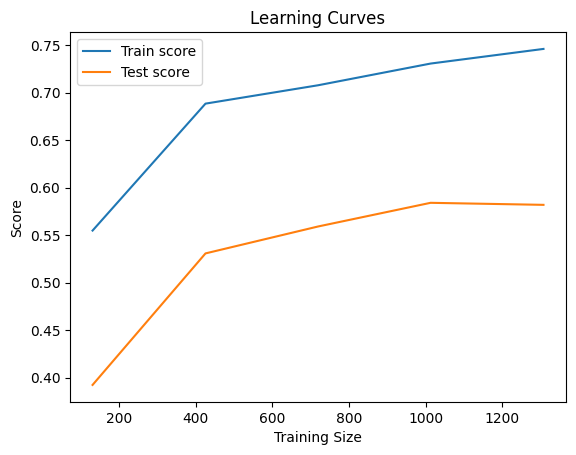

In [26]:

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()


The test score starts low but increases as the training size increases, which suggests that adding more data improves generalization.
 
There is still a noticeable gap between train and test scores, indicating that the model may be slightly overfitting.
